Name 	:- Amit.Y.Zope

Roll No.:- 323066	

Gr No.	:- 21810714

Division:- C

Batch 	:- C3

Subject	:- Data Science


Dataset : Churn Prediction 

The bank wants you to identify customers likely to churn balances below the minimum balance.

Prediction : To predict a customer is able to churn or not. Will keepk minimum balance or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading the data
datachurn = pd.read_csv("churn_prediction.csv")
datachurn

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [3]:
datachurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

# Data Preprocessing and Data Transformation

In [4]:
# treating the missing values
datachurn.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [5]:
# so there are sum null values present in the data set which are needed to be treated.
# filling the missing values
sum_of_null = datachurn.isnull().sum()
sum_of_null[sum_of_null!=0].count()
print(sum_of_null[sum_of_null!=0].count())
print(sum_of_null[sum_of_null!=0])
# there are five such columns which have null values

5
gender                          525
dependents                     2463
occupation                       80
city                            803
days_since_last_transaction    3223
dtype: int64


In [6]:
# for the gender and occupation imputing the columns with mode strategy
categoricalcol = ['gender','occupation']
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
datachurn[categoricalcol] = imputer.fit_transform(datachurn[categoricalcol])
datachurn

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [7]:
# city has been anonymized with random numbers
# data['city'].mean()

In [8]:
# for all other numerical columns having missing values imputing them with mean strategy
numericalcols = ['dependents','days_since_last_transaction','city']
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
datachurn[numericalcols] = imputer.fit_transform(datachurn[numericalcols])
datachurn.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.000000,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [9]:
# all the values had been filled
print(datachurn.info())
print(datachurn.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  object 
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  object 
 6   city                            28382 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     28382 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [10]:
# now transforming the object datatypes to classes so that model can be build
datachurn.select_dtypes('object').head()
# as there are 2 object datatypes converting then appropriatley

,gender,occupation
0,Male,self_employed
1,Male,self_employed
2,Male,salaried
3,Male,self_employed
4,Male,self_employed


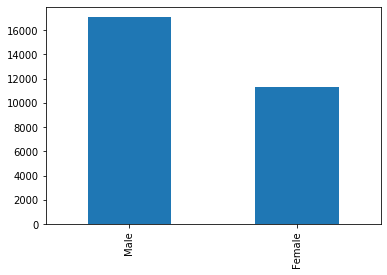

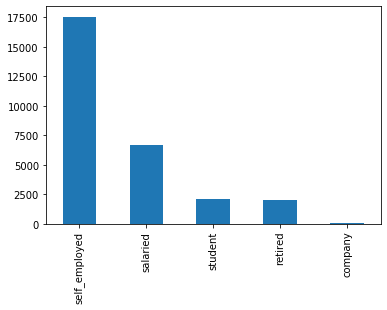

In [11]:
# plotting bar graph for object datatypes
datachurn['gender'].value_counts().plot(kind='bar')
plt.show()
datachurn['occupation'].value_counts().plot(kind='bar')
plt.show()

In [12]:
# checking value counts for some columns
datachurn['churn'].value_counts()
# data is imbalanced

0    23122
1     5260
Name: churn, dtype: int64

In [13]:
datachurn['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [14]:
# changing the male gender to class 1 and female gender to class 0 for model building
datachurn["gender"]= datachurn["gender"].map({"Male":1,"Female":0})
datachurn.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [15]:
# datachurn.drop(columns=['occupation'],axis=1,inplace=True)
# for occupation the variables will be replaced with dummy codes
occucodes = pd.get_dummies(datachurn['occupation'])
occucodes.head()
# so this follwing is the dummy codes

,company,retired,salaried,self_employed,student
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [16]:
# putting the dummy codes in data sets for occupation colum
for i in range(len(occucodes.columns)):
    datachurn.insert(5+i,occucodes.columns[i],occucodes[occucodes.columns[i]])
datachurn.head()

,customer_id,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,0,0,0,1,0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,0,0,0,1,0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,0,0,1,0,0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,0,0,0,1,0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,0,0,0,1,0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [17]:
datachurn.drop(['occupation'],axis=1,inplace=True)

In [18]:
datachurn.head()

,customer_id,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,0,0,0,1,0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,0,0,0,1,0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,0,0,1,0,0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,0,0,0,1,0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,0,0,0,1,0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Building Model Logistic Regression

In [19]:
# separating the input and output variable for building model
# independant variables
X = datachurn.drop(columns = ['churn','customer_id'],axis = 1)
# dependant variables
Y = datachurn['churn']

In [20]:
X.head()

,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,city,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,1,0.000000,0,0,0,1,0,187.000000,...,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,310,35,1,0.000000,0,0,0,1,0,796.109576,...,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,2356,31,1,0.000000,0,0,1,0,0,146.000000,...,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,478,90,1,0.347236,0,0,0,1,0,1020.000000,...,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,2531,42,1,2.000000,0,0,0,1,0,1494.000000,...,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16


In [21]:
Y.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

# Normalizing the data 

In [22]:
from sklearn.preprocessing import StandardScaler as SS

In [23]:
# instance of StandardScalar
scalar = SS()

In [24]:
X = scalar.fit_transform(X)

# Spilliting the data in train and test datasets

In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
x_train, x_test, y_train , y_test =  tts(X,Y,train_size = 0.8,random_state=20,stratify=Y)

In [27]:
# now dimensions for train and test datasets are same 
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((22705, 23), (5677, 23), (22705,), (5677,))

In [28]:
x_train

array([[-0.40515372, -1.35949574,  0.81387401, ..., -0.1374143 ,
        -0.094001  , -0.12666418],
       [ 0.39231418, -0.57328143, -1.2286914 , ..., -0.06392706,
        -0.12449785, -0.114665  ],
       [ 1.14630643, -0.06785795, -1.2286914 , ..., -0.06981579,
        -0.14465263, -0.13249149],
       ...,
       [ 0.21530612, -0.12401611,  0.81387401, ...,  0.07144444,
        -0.16570385, -0.11400817],
       [-0.62750069, -0.74175593,  0.81387401, ...,  0.44365454,
        -0.14759602, -0.108664  ],
       [ 0.92209621, -0.01169978, -1.2286914 , ..., -0.08278662,
        -0.04080115, -0.02323541]])

In [29]:
x_test

array([[ 0.2289699 , -0.68559776, -1.2286914 , ..., -0.1374324 ,
        -0.10011641, -0.10681159],
       [-0.5653926 , -0.23633244,  0.81387401, ...,  0.09772148,
        -0.11686507, -0.1192331 ],
       [ 2.17667968,  0.26909104,  0.81387401, ...,  0.29516983,
        -0.10114964, -0.0803391 ],
       ...,
       [-0.86102712, -0.57328143,  0.81387401, ..., -0.13741553,
        -0.10492903, -0.14190885],
       [ 1.29847125,  1.05530535,  0.81387401, ..., -0.13309178,
        -0.14006697, -0.13201472],
       [-0.81134065, -0.57328143,  0.81387401, ..., -0.11821772,
         0.02403808, -0.06685258]])

In [30]:
y_train

5537     0
25567    0
26083    0
27736    0
27136    0
        ..
27712    0
23934    0
2437     0
10410    0
20053    0
Name: churn, Length: 22705, dtype: int64

In [31]:
y_test

8444     0
23538    0
11806    0
14843    0
21390    1
        ..
1998     0
21963    0
11110    0
26179    0
19017    0
Name: churn, Length: 5677, dtype: int64

classifier for logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# scaling the training and test datasets
splitscale = SS()
splitscale.fit_transform(x_train,x_test)

array([[-0.40198621, -1.35568356,  0.81582248, ..., -0.13356939,
        -0.15145817, -0.20412836],
       [ 0.39425005, -0.56988645, -1.22575686, ..., -0.06238578,
        -0.20350452, -0.18396064],
       [ 1.14707778, -0.06473117, -1.22575686, ..., -0.0680899 ,
        -0.23790096, -0.21392266],
       ...,
       [ 0.21751537, -0.12085954,  0.81582248, ...,  0.0687422 ,
        -0.27382727, -0.18285668],
       [-0.62398977, -0.73827155,  0.81582248, ...,  0.42928455,
        -0.24292419, -0.17387441],
       [ 0.92321385, -0.00860281, -1.22575686, ..., -0.08065413,
        -0.06066655, -0.03028964]])

In [34]:
# instance of logisticregression
logisticclassifier = LogisticRegression(class_weight='balanced')
# fitting the data
logisticclassifier.fit(x_train,y_train)

C:\Users\Amit__Zope\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
PredictionsLRchurn = logisticclassifier.predict(x_test)
PredictionsLRchurn

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
# Accuracy score for logistic regression
from sklearn.metrics import classification_report,accuracy_score
print("For Logistic Regression")
print('Accuracy Score :',accuracy_score(y_test,PredictionsLRchurn))
print( classification_report(y_test,PredictionsLRchurn))

For Logistic Regression
Accuracy Score : 0.7163995067817509
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      4625
           1       0.35      0.63      0.45      1052

    accuracy                           0.72      5677
   macro avg       0.63      0.68      0.63      5677
weighted avg       0.80      0.72      0.74      5677



In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,PredictionsLRchurn)
print(cm)

[[3400 1225]
 [ 385  667]]


In [78]:
# overall accuaracy score
# total correctly predicted/total samples
accuscore = (3400+667)/(1225+385+667+3400)
print(accuscore)
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix
recall = (667)/(667+1225)
round(recall,2)

0.7163995067817509


0.35

In [38]:
Logisticregressionscore = logisticclassifier.score(x_test,y_test)
Logisticregressionscore

0.7163995067817509

# Model building for decision tree

In [39]:
# dataset is ready for model building 
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier as DTC
DTclassifier = DTC(class_weight='balanced')

In [40]:
x_train

array([[-0.40515372, -1.35949574,  0.81387401, ..., -0.1374143 ,
        -0.094001  , -0.12666418],
       [ 0.39231418, -0.57328143, -1.2286914 , ..., -0.06392706,
        -0.12449785, -0.114665  ],
       [ 1.14630643, -0.06785795, -1.2286914 , ..., -0.06981579,
        -0.14465263, -0.13249149],
       ...,
       [ 0.21530612, -0.12401611,  0.81387401, ...,  0.07144444,
        -0.16570385, -0.11400817],
       [-0.62750069, -0.74175593,  0.81387401, ...,  0.44365454,
        -0.14759602, -0.108664  ],
       [ 0.92209621, -0.01169978, -1.2286914 , ..., -0.08278662,
        -0.04080115, -0.02323541]])

In [41]:
# fitting the data
DTclassifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
predictingDT = DTclassifier.predict(x_test)
predictingDT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
print("For Decision Tree")
print('Accuracy Score :',accuracy_score(y_test,predictingDT))
print( classification_report(y_test,predictingDT))

For Decision Tree
Accuracy Score : 0.7875638541483178
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4625
           1       0.43      0.43      0.43      1052

    accuracy                           0.79      5677
   macro avg       0.65      0.65      0.65      5677
weighted avg       0.79      0.79      0.79      5677



In [44]:
cm2 = confusion_matrix(y_test,predictingDT)
print(cm2)

[[4021  604]
 [ 602  450]]


In [45]:
Decisiontreescore = DTclassifier.score(x_test,y_test)
Decisiontreescore

0.7875638541483178

In [46]:
# comparing the scoring of two models logistic regression and decision tree
score = {"LogisticRegression Score":[Logisticregressionscore],"DecisionTree Score":[Decisiontreescore]}
accuracyscore = pd.DataFrame(score)
accuracyscore

,LogisticRegression Score,DecisionTree Score
0,0.7164,0.787564


In [47]:
# Decision tree is better than logistic regression
# datachurn.to_csv(r'M:\Study College\TY-Btech-2021\Subjects\DSL\Submitted Assignment\Assignment 5\churnpred_A5.csv')